<h1 align=center><font size = 6>Segmenting and Clustering Covid Intensive Neighborhoods in Manhattan</font></h1>



**Capstone Project - Battle of the Neighborhoods: Applied Data Science Capstone by IBM(Coursera)**

Author: Lopamudra Nayak

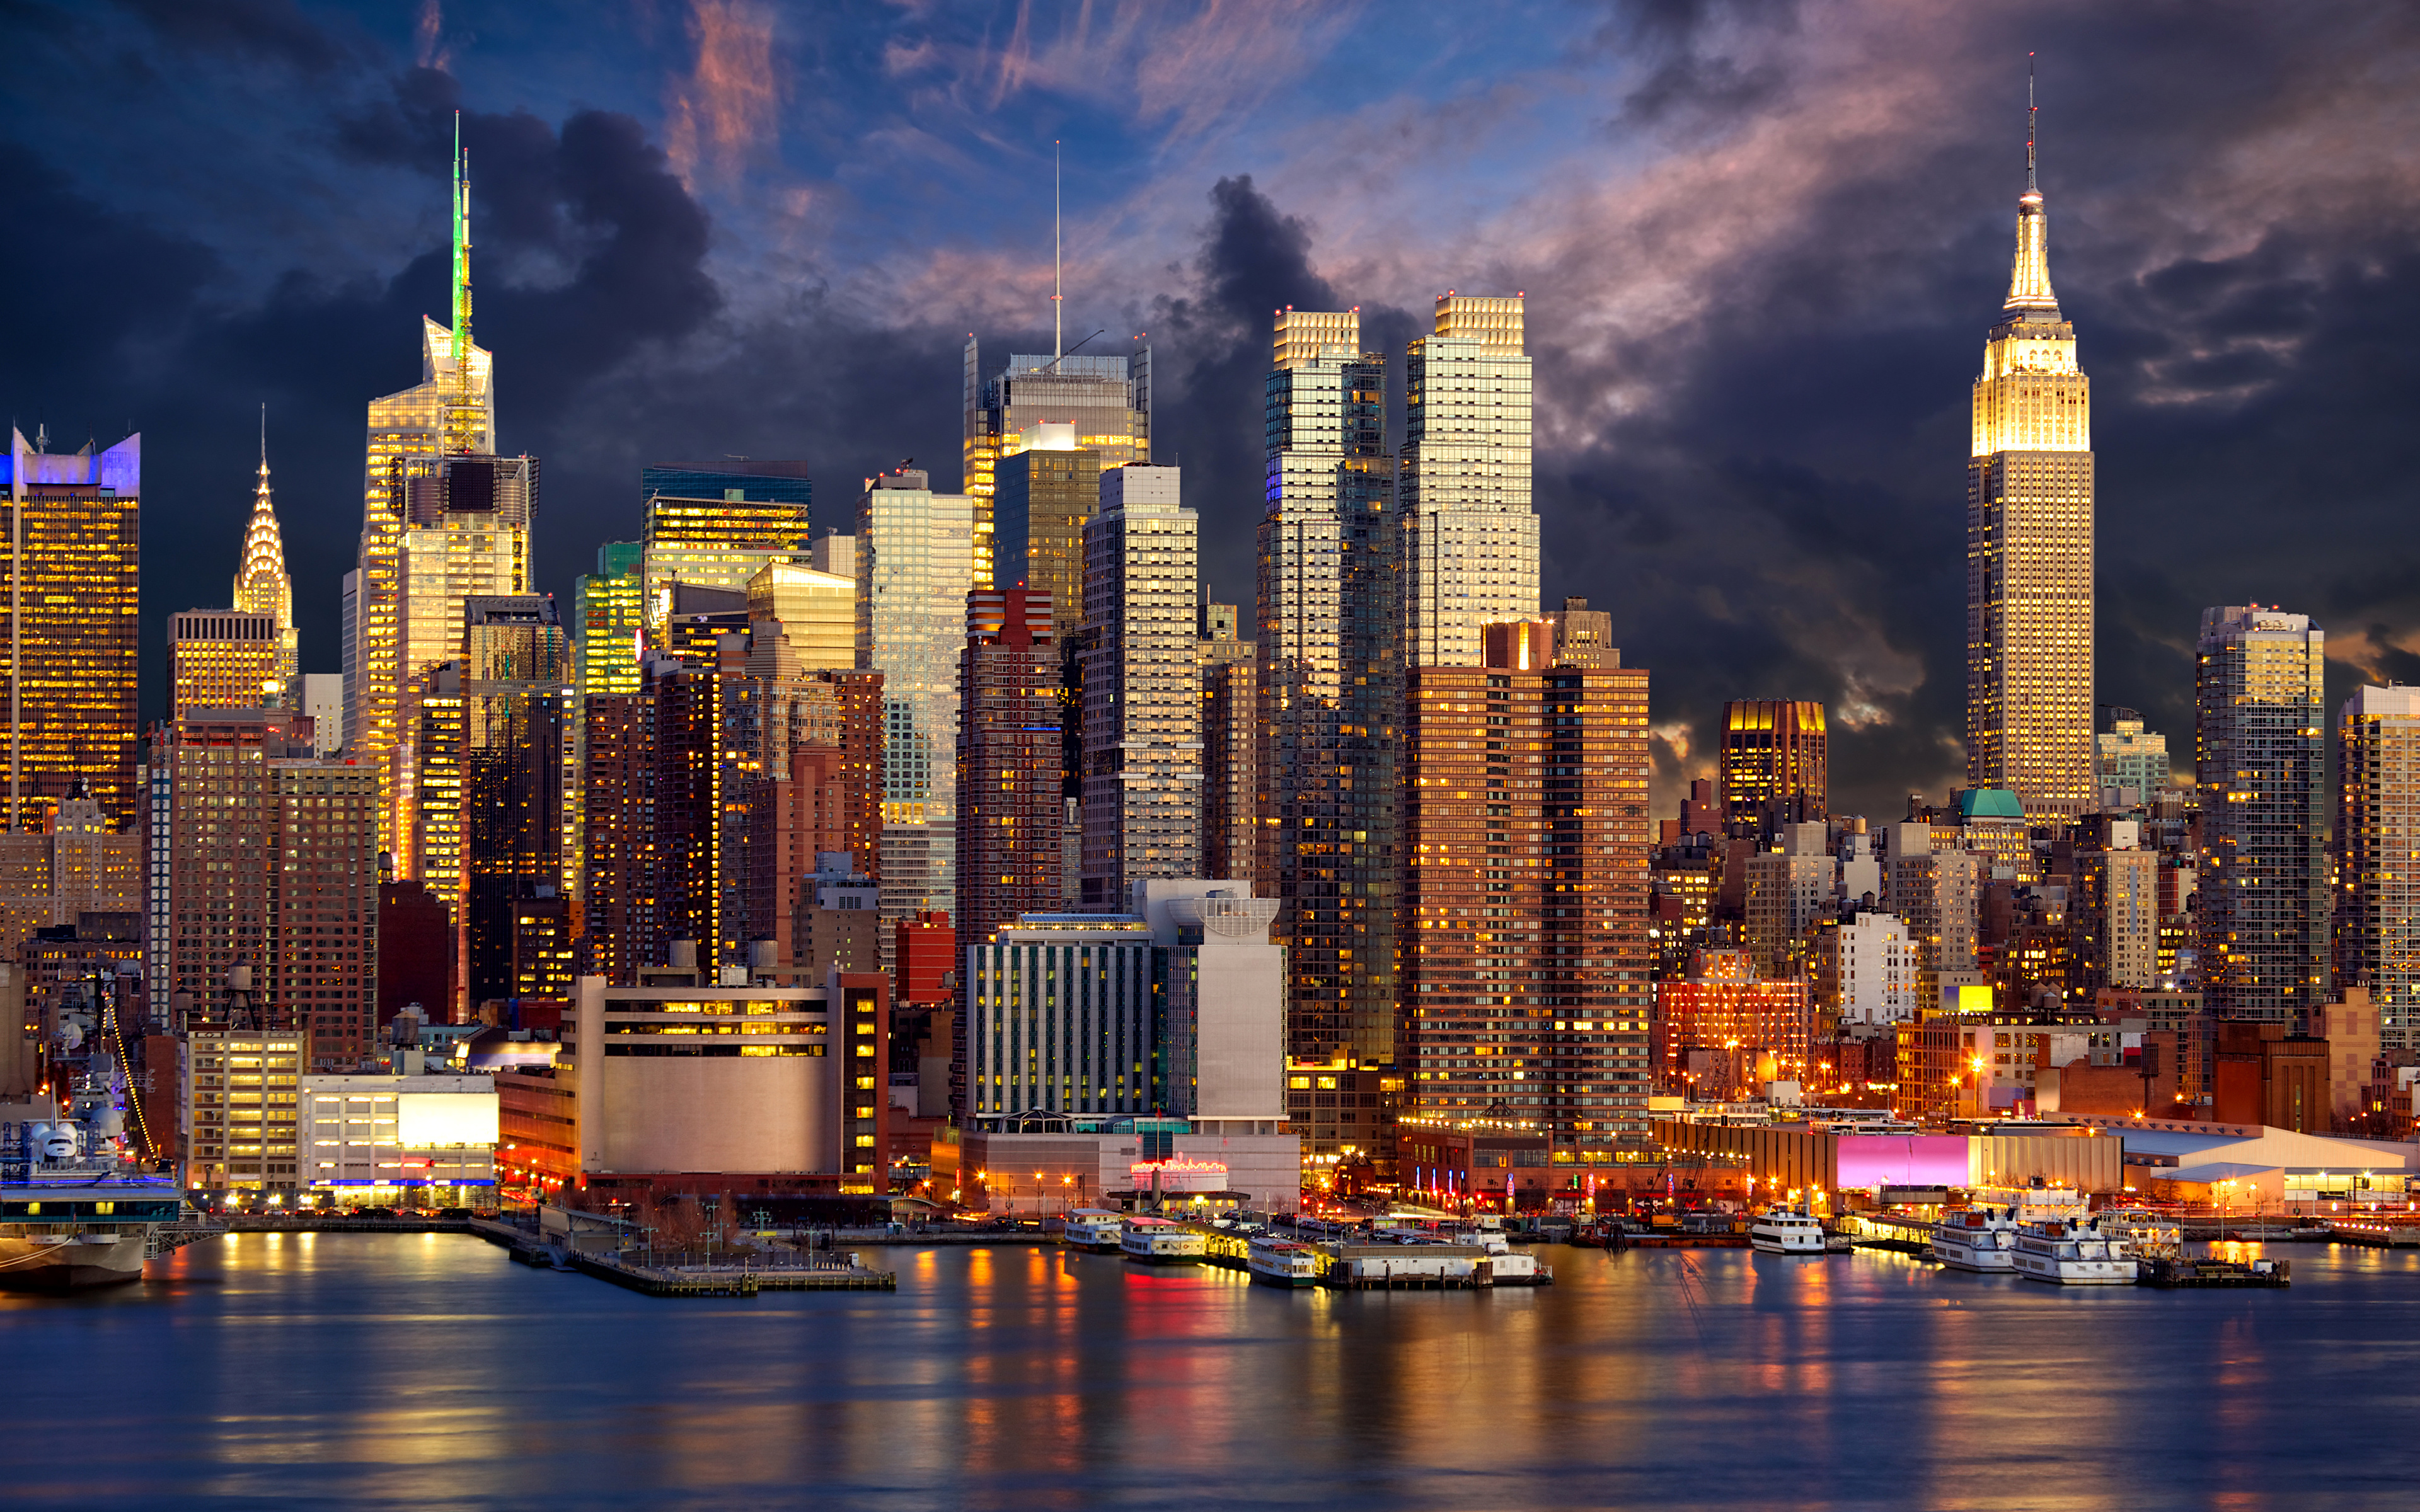

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 2>
    
1.  <a href="#item1">Introduction</a>
    
2.  <a href="#item2">Download and Explore Dataset</a>
    
3.  <a href="#item3">Explore Neighborhoods in New York City</a>
    
4.  <a href="#item4">Methodology</a>
    
5.  <a href="#item5">Analyze Each Neighborhood</a>
    
6.  <a href="#item6">Cluster Neighborhoods</a>
    
7.  <a href="#item7">Examine Clusters</a>  
    
8.  <a href="#item8">Results </a> 
    
9.  <a href="#item9">Conclusion</a>      
    
</font>
</div>


## 1. Introduction

New York is one of the most famous cities in the world also referred as the "Big Apple", this vibrant city is known for its exclusive shops, flashy Broadway performances, and high-flying business tycoons, and it’s a city that has long captivated people from all over the world. But, aside from the flashing lights, it’s also home to the beloved Statue of Liberty, a symbol of freedom and hope, and Central Park, one of the tidiest and best-kept parks in the world. The proverbial apple of New York State's eye, Manhattan is the most popular tourist destination and one of the best places to visit in New York State. It's also one of the best cities in New York and, arguably, the world. One can find literally everything your heart desires starting from the rarest antique cufflinks to the most delicious entree to grace your lips. An activity that is touristy but also for its residents is drinking coffee. The activity can be done alone, accompanied by friends, and anytime in this city.


Out of 20 countries in the world that drink more coffee per capita, Americans drink about 146 billion cups of coffee per year. In 2020, Americans drank an average of 1.87 cups of coffee per day. Between 2011 and 2020, US. coffee consumption per capita per day remained relatively close to two cups, with the exception of 2016, when US survey respondents drank roughly 1.64 cups of coffee per day. In US, people aged seventy and older drank the most coffee per day in 2020. This particular age group drank an average of almost 2.2 cups per capita per day that year. Americans aged eighteen and nineteen drank the least per capita, namely about 0.8 cups a day. In terms of gender, men drank more than women per capita in the United States in the same year. In 2020, Americans drank about 1.3 cups of coffee during breakfast each day, making it the most common time of day for people to drink coffee in the US that year. The least common time for Americans to drink coffee was during other meals. ([total-us-coffee-per-capita-consumption](https://www.statista.com/statistics/456360/total-us-coffee-per-capita-consumption/))

In this project, we will try to find an optimal location for a coffee shop. This report will be targeted at stakeholders who want to start from scratch, buy an existing business, or anybody interested in a good coffee in **Manhattan**, New York City.

We will try to detect **locations that are not already crowded with coffee shops**. We are also particularly interested in **areas with no coffee shops in the vicinity**. We would also prefer locations **as close to the city center as possible**, assuming that the first two conditions are met.

**Import Libraries:**

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


## 2. Download and Explore Dataset


Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. I have used the prepared files from IBM cloud server and simply run a `wget` command to access the data.

In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


#### Load and explore the data


Next, let's load the data.


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a _pandas_ dataframe


Now we need to transform this data of nested Python dictionaries into a _pandas_ dataframe. 
So, let's first create an empty dataframe.


In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Let's look at the empty dataframe to confirm that the columns are as intended.

In [8]:
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.


In [9]:
for data in neighborhoods_data:
    borough  = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Now just quickly examine the resulting dataframe.


In [10]:
neighborhoods.tail()

Borough  Neighborhood   Latitude  Longitude
301      Manhattan  Hudson Yards  40.756658 -74.000111
302         Queens       Hammels  40.587338 -73.805530
303         Queens     Bayswater  40.611322 -73.765968
304         Queens  Queensbridge  40.756091 -73.945631
305  Staten Island     Fox Hills  40.617311 -74.081740

In [11]:
neighborhoods.shape

(306, 4)

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.


In [15]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [354]:
manhattan_data.shape

(40, 4)

Let's get the geographical coordinates of Manhattan.


In [16]:
address = 'Manhattan'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.


In [17]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


## 3. Methodology 

The objective of this project is to find areas of Manhattan with a low density of coffee shops.

First, we will check the candidate neighborhoods. It will be created the latitude & longitude coordinates for centroids of our candidate neighborhoods. We will create a grid of cells covering our area of interest which is centered around the Neighborhood Upper West Side.

Secondly, we will get the top 100 venues that are in Central Park within a radius of 2.5 kilometers and explore their neighborhods. 


In [19]:
manhattan_data.loc[manhattan_data['Neighborhood']== 'Upper West Side']

Borough     Neighborhood   Latitude  Longitude
12  Manhattan  Upper West Side  40.787658 -73.977059

In [20]:
# create map of Montreal using latitude and longitude values
latitude = 40.787658
longitude = -73.977059

map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Now, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.
Define Foursquare Credentials and Version


In [198]:
CLIENT_ID = 'WSXE233GWXGSUAOVKYCT4LBDMMQ2G4GY1BGK5JUD0GHNPZPJ' # your Foursquare ID
CLIENT_SECRET = 'CVC44UHNFX2SCREGZB0JBXI3045J3PFIYD1U4PG4T1A3ZVJZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WSXE233GWXGSUAOVKYCT4LBDMMQ2G4GY1BGK5JUD0GHNPZPJ
CLIENT_SECRET:CVC44UHNFX2SCREGZB0JBXI3045J3PFIYD1U4PG4T1A3ZVJZ


#### Let's explore the first neighborhood in our dataframe.


Get the neighborhood's name.


In [257]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.


In [258]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


<a id='item2'></a>


## 4. Explore Neighborhoods in Manhattan


#### Let's create a function to get 100 venues of the neighborhoods within a radius of 3.5kms 


In [259]:
def getNearbyVenues(names, latitudes, longitudes, radius=3500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [260]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe


In [261]:
print(manhattan_venues.shape)
manhattan_venues.head()

(4000, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Marble Hill              40.876551               -73.91066   
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   

                   Venue  Venue Latitude  Venue Longitude  \
0            Bikram Yoga       40.876844       -73.906204   
1          Tibbett Diner       40.880404       -73.908937   
2            Sam's Pizza       40.879435       -73.905859   
3  Garden Gourmet Market       40.881350       -73.903389   
4             El Malecon       40.879338       -73.904457   

         Venue Category  
0           Yoga Studio  
1                 Diner  
2           Pizza Place  
3          Gourmet Shop  
4  Caribbean Restaurant

Let's check how many venues were returned for each neighborhood


In [262]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                      100                     100    100   
Carnegie Hill                          100                     100    100   
Central Harlem                         100                     100    100   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                            100                     100    100   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                               100                     100    100   
Greenwich Village                      100                     100    100   
Hamilton Heights                       100                     100    100   
Hudson Yards                           100                     100    100   
Inwood                                 100                     100    100   
Lenox Hill                             100                     100    100   
Lincoln Square                         100                     100    100   
Little Italy                           100                     100    100   
Lower East Side                        100                     100    100   
Manhattan Valley                       100                     100    100   
Manhattanville                         100                     100    100   
Marble Hill                            100                     100    100   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                    100                     100    100   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                       100                     100    100   
Soho                                   100                     100    100   
Stuyvesant Town                        100                     100    100   
Sutton Place                           100                     100    100   
Tribeca                                100                     100    100   
Tudor City                             100                     100    100   
Turtle Bay                             100                     100    100   
Upper East Side                        100                     100    100   
Upper West Side                        100                     100    100   
Washington Heights                     100                     100    100   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City               100              100             100  
Carnegie Hill                   100              100             100  
Central Harlem                  100              100             100  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                     100              100             100  
East Village                    100              100             100  
Finan

#### Let's find out how many unique categories can be curated from all the returned venues


In [280]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 202 uniques categories.


<a id='item3'></a>


## 5. Analyze Each Neighborhood


In [281]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  African Restaurant  American Restaurant  Animal Shelter  \
0  Marble Hill                   0                    0               0   
1  Marble Hill                   0                    0               0   
2  Marble Hill                   0                    0               0   
3  Marble Hill                   0                    0               0   
4  Marble Hill                   0                    0               0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  BBQ Joint  \
0                 0                   0                      0          0   
1                 0                   0                      0          0   
2                 0                   0                      0          0   
3                 0                   0                      0          0   
4                 0                   0                      0          0   

   Bagel Shop  Bakery  Bar  Baseball Field  Baseball Stadium  \
0           0       0    0               0                 0   
1           0       0    0               0                 0   
2           0       0    0               0                 0   
3           0       0    0               0                 0   
4           0       0    0               0                 0   

   Basketball Court  Beach  Beer Bar  Beer Store  Bike Trail  Bistro  \
0                 0      0         0           0           0       0   
1                 0      0         0           0           0       0   
2                 0      0         0           0           0       0   
3                 0      0         0           0           0       0   
4                 0      0         0           0           0       0   

   Bookstore  Botanical Garden  Boutique  Boxing Gym  Brewery  Bridge  \
0          0                 0         0           0        0       0   
1          0                 0         0           0        0       0   
2          0                 0         0           0        0       0   
3          0                 0         0           0        0       0   
4          0                 0         0           0        0       0   

   Building  Burger Joint  Burrito Place  Butcher  Café  Caribbean Restaurant  \
0         0             0              0        0     0                     0   
1         0             0              0        0     0                     0   
2         0             0              0        0     0                     0   
3         0             0              0        0     0                     0   
4         0             0              0        0     0                     1   

   Castle  Cheese Shop  Chinese Restaurant  Chocolate Shop  Church  \
0       0            0                   0               0       0   
1       0            0                   0               0       0   
2       0            0                   0               0       0   
3       0            0                   0               0       0   
4       0            0                   0               0       0   

   Climbing Gym  Clothing Store  Club House  Cocktail Bar  Coffee Shop  \
0             0               0           0             0            0   
1             0               0           0             0            0   
2             0               0           0             0            0   
3             0               0           0             0            0   
4             0               0           0             0            0   

   College Arts Building  Comedy Club  Comfor

And let's examine the new dataframe size.


In [282]:
manhattan_onehot.shape

(4000, 203)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [283]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

Neighborhood  African Restaurant  American Restaurant  \
0     Battery Park City                0.00                 0.00   
1         Carnegie Hill                0.00                 0.02   
2        Central Harlem                0.02                 0.02   
3               Chelsea                0.00                 0.03   
4             Chinatown                0.00                 0.00   
5          Civic Center                0.00                 0.00   
6               Clinton                0.00                 0.00   
7           East Harlem                0.01                 0.02   
8          East Village                0.00                 0.02   
9    Financial District                0.00                 0.01   
10             Flatiron                0.00                 0.02   
11             Gramercy                0.00                 0.02   
12    Greenwich Village                0.00                 0.02   
13     Hamilton Heights                0.01                 0.02   
14         Hudson Yards                0.00                 0.01   
15               Inwood                0.00                 0.02   
16           Lenox Hill                0.00                 0.00   
17       Lincoln Square                0.00                 0.01   
18         Little Italy                0.00                 0.01   
19      Lower East Side                0.00                 0.02   
20     Manhattan Valley                0.02                 0.03   
21       Manhattanville                0.02                 0.03   
22          Marble Hill                0.00                 0.01   
23              Midtown                0.00                 0.01   
24        Midtown South                0.00                 0.03   
25  Morningside Heights                0.03                 0.01   
26          Murray Hill                0.00                 0.01   
27                 Noho                0.00                 0.02   
28     Roosevelt Island                0.00                 0.00   
29                 Soho                0.00                 0.02   
30      Stuyvesant Town                0.00                 0.02   
31         Sutton Place                0.00                 0.00   
32              Tribeca                0.00                 0.02   
33           Tudor City                0.00                 0.01   
34           Turtle Bay                0.00                 0.01   
35      Upper East Side                0.00                 0.00   
36      Upper West Side                0.00                 0.01   
37   Washington Heights                0.00                 0.01   
38         West Village                0.00                 0.03   
39            Yorkville                0.00                 0.00   

    Animal Shelter  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0.00              0.00                    0.00         0.00   
1             0.00              0.00                    0.00         0.01   
2             0.00              0.00                    0.00         0.00   
3             0.00              0.00                    0.00         0.03   
4             0.00              0.00                    0.01         0.01   
5             0.00              0.00                    0.01         0.00   
6             0.00              0.00                    0.00         0.04   
7             0.01              0.00                    0.00         0.00   
8             0.00              0.00                    0.00         0.01   
9             0.00              0.00                    0.00         0.00   
10            0.00              0.00                    0.00         0.01   
11            0.00              0.00                    0.00         0.01   
12            0.00              0.00                    0.00         0.01   
13            0.00              0.00                    0.00         0.00   
14            0.00              0.00                    0.00       

In [284]:
manhattan_grouped.describe()

African Restaurant  American Restaurant  Animal Shelter  \
count           40.000000            40.000000       40.000000   
mean             0.002750             0.013750        0.000250   
std              0.007157             0.009789        0.001581   
min              0.000000             0.000000        0.000000   
25%              0.000000             0.010000        0.000000   
50%              0.000000             0.010000        0.000000   
75%              0.000000             0.020000        0.000000   
max              0.030000             0.030000        0.010000   

       Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
count         40.000000               40.000000    40.000000   40.000000   
mean           0.000250                0.001000     0.009250    0.010250   
std            0.001581                0.003038     0.010715    0.006975   
min            0.000000                0.000000     0.000000    0.000000   
25%            0.000000                0.000000     0.000000    0.010000   
50%            0.000000                0.000000     0.010000    0.010000   
75%            0.000000                0.000000     0.010000    0.010000   
max            0.010000                0.010000     0.040000    0.030000   

       Asian Restaurant  Athletics & Sports  Australian Restaurant  BBQ Joint  \
count         40.000000           40.000000              40.000000  40.000000   
mean           0.000750            0.001250               0.001500   0.001000   
std            0.002667            0.003349               0.003616   0.003038   
min            0.000000            0.000000               0.000000   0.000000   
25%            0.000000            0.000000               0.000000   0.000000   
50%            0.000000            0.000000               0.000000   0.000000   
75%            0.000000            0.000000               0.000000   0.000000   
max            0.010000            0.010000               0.010000   0.010000   

       Bagel Shop     Bakery        Bar  Baseball Field  Baseball Stadium  \
count   40.000000  40.000000  40.000000       40.000000         40.000000   
mean     0.009000   0.026500   0.009000        0.000750          0.001250   
std      0.005905   0.014242   0.010328        0.003499          0.004634   
min      0.000000   0.000000   0.000000        0.000000          0.000000   
25%      0.010000   0.020000   0.000000        0.000000          0.000000   
50%      0.010000   0.020000   0.010000        0.000000          0.000000   
75%      0.010000   0.040000   0.012500        0.000000          0.000000   
max      0.020000   0.060000   0.040000        0.020000          0.020000   

       Basketball Court      Beach   Beer Bar  Beer Store  Bike Trail  \
count         40.000000  40.000000  40.000000   40.000000   40.000000   
mean           0.001500   0.001500   0.008500    0.004000    0.001000   
std            0.004267   0.003616   0.006622    0.004961    0.003038   
min            0.000000   0.000000   0.000000    0.000000    0.000000   
25%            0.000000   0.000000   0.000000    0.000000    0.000000   
50%            0.000000   0.000000   0.010000    0.000000    0.000000   
75%            0.000000   0.000000   0.010000    0.010000    0.000000   
max            0.020000   0.010000   0.020000    0.010000    0.010000   

          Bistro  Bookstore  Botanical Garden   Boutique  Boxing Gym  \
count  40.000000  40.000000         40.000000  40.000000   40.000000   
mean    0.000750   0.022750          0.000250   0.004250    0.004500   
std     0.002667   0.015357          0.001581   0.007472    0.006385   
min     0.000000   0.000000          0.000000   0.000000    0.000000   
25%     0.000000   0.010000          0.000000   0.000000    0.000000   
50%     0.000000   0.020000          0.000000   0.000000    0.000000   
75%     0.000000   0.030000          0.000000   0.010000    0.010000   
max     0.010000   0.060000          0.010000   0.020000    0.020000 

#### Let's confirm the new size


In [285]:
manhattan_grouped.shape

(40, 203)

In [286]:
manhattan_part = manhattan_grouped[['Neighborhood', 'Coffee Shop']]
manhattan_part

Neighborhood  Coffee Shop
0     Battery Park City         0.03
1         Carnegie Hill         0.02
2        Central Harlem         0.07
3               Chelsea         0.03
4             Chinatown         0.02
5          Civic Center         0.04
6               Clinton         0.02
7           East Harlem         0.03
8          East Village         0.01
9    Financial District         0.03
10             Flatiron         0.02
11             Gramercy         0.01
12    Greenwich Village         0.01
13     Hamilton Heights         0.07
14         Hudson Yards         0.02
15               Inwood         0.01
16           Lenox Hill         0.01
17       Lincoln Square         0.02
18         Little Italy         0.02
19      Lower East Side         0.01
20     Manhattan Valley         0.04
21       Manhattanville         0.09
22          Marble Hill         0.02
23              Midtown         0.00
24        Midtown South         0.02
25  Morningside Heights         0.08
26          Murray Hill         0.02
27                 Noho         0.01
28     Roosevelt Island         0.01
29                 Soho         0.03
30      Stuyvesant Town         0.02
31         Sutton Place         0.01
32              Tribeca         0.03
33           Tudor City         0.00
34           Turtle Bay         0.00
35      Upper East Side         0.03
36      Upper West Side         0.01
37   Washington Heights         0.02
38         West Village         0.04
39            Yorkville         0.02

In [287]:
manhattan_merged = pd.merge(manhattan_data, manhattan_part, on='Neighborhood')
manhattan_merged.head()

Borough        Neighborhood   Latitude  Longitude  Coffee Shop
0  Manhattan         Marble Hill  40.876551 -73.910660         0.02
1  Manhattan           Chinatown  40.715618 -73.994279         0.02
2  Manhattan  Washington Heights  40.851903 -73.936900         0.02
3  Manhattan              Inwood  40.867684 -73.921210         0.01
4  Manhattan    Hamilton Heights  40.823604 -73.949688         0.07

**Bar chart of coffee shops**

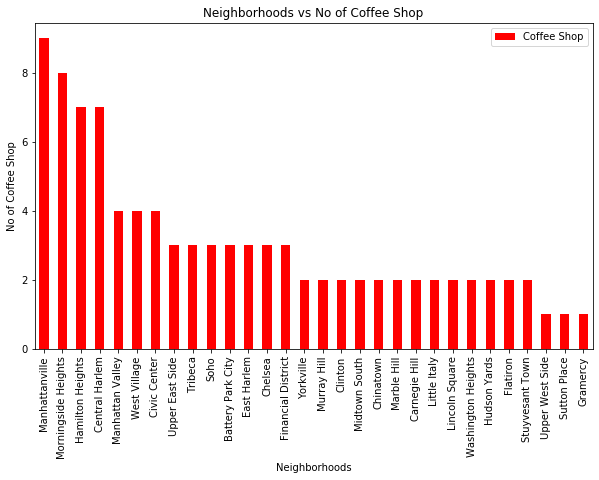

In [288]:
import matplotlib.pyplot as plt
graph = pd.DataFrame(manhattan_onehot.groupby('Neighborhood')['Coffee Shop'].sum())
graph = graph.sort_values(by ='Coffee Shop', ascending=False)
graph.iloc[:30].plot(kind='bar', figsize=(10,6),color= 'red')
plt.xlabel("Neighborhoods")
plt.ylabel("No of Coffee Shop")
plt.title("Neighborhoods vs No of Coffee Shop")
plt.show()

In [289]:
graph

Coffee Shop
Neighborhood                    
Manhattanville                 9
Morningside Heights            8
Hamilton Heights               7
Central Harlem                 7
Manhattan Valley               4
West Village                   4
Civic Center                   4
Upper East Side                3
Tribeca                        3
Soho                           3
Battery Park City              3
East Harlem                    3
Chelsea                        3
Financial District             3
Yorkville                      2
Murray Hill                    2
Clinton                        2
Midtown South                  2
Chinatown                      2
Marble Hill                    2
Carnegie Hill                  2
Little Italy                   2
Lincoln Square                 2
Washington Heights             2
Hudson Yards                   2
Flatiron                       2
Stuyvesant Town                2
Upper West Side                1
Sutton Place                   1
Gramercy                       1
Roosevelt Island               1
Noho                           1
Greenwich Village              1
Lower East Side                1
Lenox Hill                     1
Inwood                         1
East Village                   1
Tudor City                     0
Turtle Bay                     0
Midtown                        0

In [322]:
coffee_df = manhattan_grouped[['Neighborhood','Coffee Shop']]

coffee_df.head()

Neighborhood  Coffee Shop
0  Battery Park City         0.03
1      Carnegie Hill         0.02
2     Central Harlem         0.07
3            Chelsea         0.03
4          Chinatown         0.02

<a id='item4'></a>


## 5. Cluster Neighborhoods


In [323]:
df_clustering = coffee_df.drop('Neighborhood', 1)

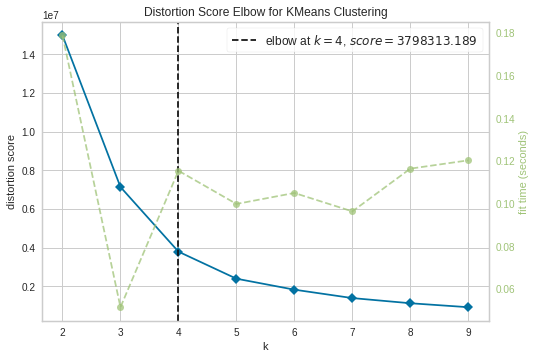

/home/lopa/.local/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f53607cab38>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=None)

In [330]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

df_clustering, y = load_nfl()

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), df_clustering, k=(2,10))

Run _k_-means to cluster the neighborhood into 4 clusters.


In [331]:
# set number of clusters
kclusters = 4

coffee_grouped_clustering = coffee_df.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffee_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 0, 3, 0, 3, 0, 2, 0], dtype=int32)

In [334]:
#make a copy of manhattan_data

coffee_merged = coffee_df

# add clustering labels

coffee_merged['Cluster Labels'] = kmeans.labels_

# add latitude/longitude for each neighborhood
coffee_merged = coffee_merged.join(manhattan_data.set_index('Neighborhood'), on='Neighborhood')

coffee_merged.head() # check the last columns!

/home/lopa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0  Battery Park City         0.03               0  Manhattan  40.711932   
1      Carnegie Hill         0.02               3  Manhattan  40.782683   
2     Central Harlem         0.07               1  Manhattan  40.815976   
3            Chelsea         0.03               0  Manhattan  40.744035   
4          Chinatown         0.02               3  Manhattan  40.715618   

   Longitude  
0 -74.016869  
1 -73.953256  
2 -73.943211  
3 -74.003116  
4 -73.994279

In [335]:
# Sort by cluster

coffee_merged.sort_values(['Cluster Labels'], inplace=True)

coffee_merged.head()

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0    Battery Park City         0.03               0  Manhattan  40.711932   
29                Soho         0.03               0  Manhattan  40.722184   
38        West Village         0.04               0  Manhattan  40.734434   
9   Financial District         0.03               0  Manhattan  40.707107   
7          East Harlem         0.03               0  Manhattan  40.792249   

    Longitude  
0  -74.016869  
29 -74.000657  
38 -74.006180  
9  -74.010665  
7  -73.944182

In [336]:
coffee_merged = coffee_merged.reset_index(drop=True)
coffee_merged.head()

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0   Battery Park City         0.03               0  Manhattan  40.711932   
1                Soho         0.03               0  Manhattan  40.722184   
2        West Village         0.04               0  Manhattan  40.734434   
3  Financial District         0.03               0  Manhattan  40.707107   
4         East Harlem         0.03               0  Manhattan  40.792249   

   Longitude  
0 -74.016869  
1 -74.000657  
2 -74.006180  
3 -74.010665  
4 -73.944182

In [337]:
coffee_merged.shape

(40, 6)

Finally, let's visualize the resulting clusters


In [338]:
# create map
latitude = 40.787658
longitude = -73.977059
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['yellow','blue','red','cyan']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(coffee_merged['Latitude'], coffee_merged['Longitude'], coffee_merged['Neighborhood'], coffee_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters


In [339]:
# minimum frequency of coffee shop
coffee_merged['Coffee Shop'].min()

0.0

In [340]:
# maximum frequency of coffee shop
coffee_merged['Coffee Shop'].max()

0.09

#### Cluster 1


In [341]:
coffee_merged.loc[coffee_merged['Cluster Labels'] == 0]

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0   Battery Park City         0.03               0  Manhattan  40.711932   
1                Soho         0.03               0  Manhattan  40.722184   
2        West Village         0.04               0  Manhattan  40.734434   
3  Financial District         0.03               0  Manhattan  40.707107   
4         East Harlem         0.03               0  Manhattan  40.792249   
5             Tribeca         0.03               0  Manhattan  40.721522   
6     Upper East Side         0.03               0  Manhattan  40.775639   
7             Chelsea         0.03               0  Manhattan  40.744035   
8        Civic Center         0.04               0  Manhattan  40.715229   
9    Manhattan Valley         0.04               0  Manhattan  40.797307   

   Longitude  
0 -74.016869  
1 -74.000657  
2 -74.006180  
3 -74.010665  
4 -73.944182  
5 -74.010683  
6 -73.960508  
7 -74.003116  
8 -74.005415  
9 -73.964286

#### Cluster 2


In [342]:
coffee_merged.loc[coffee_merged['Cluster Labels'] ==1]

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
10       Central Harlem         0.07               1  Manhattan  40.815976   
11     Hamilton Heights         0.07               1  Manhattan  40.823604   
12  Morningside Heights         0.08               1  Manhattan  40.808000   
13       Manhattanville         0.09               1  Manhattan  40.816934   

    Longitude  
10 -73.943211  
11 -73.949688  
12 -73.963896  
13 -73.957385

#### Cluster 3


In [343]:
coffee_merged.loc[coffee_merged['Cluster Labels'] ==2]

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
14         Turtle Bay         0.00               2  Manhattan  40.752042   
15         Tudor City         0.00               2  Manhattan  40.746917   
16       Sutton Place         0.01               2  Manhattan  40.760280   
17    Upper West Side         0.01               2  Manhattan  40.787658   
18   Roosevelt Island         0.01               2  Manhattan  40.762160   
19               Noho         0.01               2  Manhattan  40.723259   
20            Midtown         0.00               2  Manhattan  40.754691   
21    Lower East Side         0.01               2  Manhattan  40.717807   
22         Lenox Hill         0.01               2  Manhattan  40.768113   
23             Inwood         0.01               2  Manhattan  40.867684   
24  Greenwich Village         0.01               2  Manhattan  40.726933   
25       East Village         0.01               2  Manhattan  40.727847   
26           Gramercy         0.01               2  Manhattan  40.737210   

    Longitude  
14 -73.967708  
15 -73.971219  
16 -73.963556  
17 -73.977059  
18 -73.949168  
19 -73.988434  
20 -73.981669  
21 -73.980890  
22 -73.958860  
23 -73.921210  
24 -73.999914  
25 -73.982226  
26 -73.981376

#### Cluster 4


In [344]:
coffee_merged.loc[coffee_merged['Cluster Labels'] ==3]

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
27         Marble Hill         0.02               3  Manhattan  40.876551   
28  Washington Heights         0.02               3  Manhattan  40.851903   
29       Carnegie Hill         0.02               3  Manhattan  40.782683   
30           Chinatown         0.02               3  Manhattan  40.715618   
31             Clinton         0.02               3  Manhattan  40.759101   
32     Stuyvesant Town         0.02               3  Manhattan  40.731000   
33        Little Italy         0.02               3  Manhattan  40.719324   
34        Hudson Yards         0.02               3  Manhattan  40.756658   
35         Murray Hill         0.02               3  Manhattan  40.748303   
36       Midtown South         0.02               3  Manhattan  40.748510   
37      Lincoln Square         0.02               3  Manhattan  40.773529   
38            Flatiron         0.02               3  Manhattan  40.739673   
39           Yorkville         0.02               3  Manhattan  40.775930   

    Longitude  
27 -73.910660  
28 -73.936900  
29 -73.953256  
30 -73.994279  
31 -73.996119  
32 -73.974052  
33 -73.997305  
34 -74.000111  
35 -73.978332  
36 -73.988713  
37 -73.985338  
38 -73.990947  
39 -73.947118

In [345]:
# locations that are not already crowded with coffee shops
low_coffee = (coffee_merged.loc[coffee_merged['Cluster Labels'] == 2]).reset_index(drop=True)
low_coffee

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0          Turtle Bay         0.00               2  Manhattan  40.752042   
1          Tudor City         0.00               2  Manhattan  40.746917   
2        Sutton Place         0.01               2  Manhattan  40.760280   
3     Upper West Side         0.01               2  Manhattan  40.787658   
4    Roosevelt Island         0.01               2  Manhattan  40.762160   
5                Noho         0.01               2  Manhattan  40.723259   
6             Midtown         0.00               2  Manhattan  40.754691   
7     Lower East Side         0.01               2  Manhattan  40.717807   
8          Lenox Hill         0.01               2  Manhattan  40.768113   
9              Inwood         0.01               2  Manhattan  40.867684   
10  Greenwich Village         0.01               2  Manhattan  40.726933   
11       East Village         0.01               2  Manhattan  40.727847   
12           Gramercy         0.01               2  Manhattan  40.737210   

    Longitude  
0  -73.967708  
1  -73.971219  
2  -73.963556  
3  -73.977059  
4  -73.949168  
5  -73.988434  
6  -73.981669  
7  -73.980890  
8  -73.958860  
9  -73.921210  
10 -73.999914  
11 -73.982226  
12 -73.981376

In [346]:
# locations that are  crowded with coffee shops
high_coffee = (coffee_merged.loc[coffee_merged['Cluster Labels'] == 1]).reset_index(drop=True)
high_coffee

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0       Central Harlem         0.07               1  Manhattan  40.815976   
1     Hamilton Heights         0.07               1  Manhattan  40.823604   
2  Morningside Heights         0.08               1  Manhattan  40.808000   
3       Manhattanville         0.09               1  Manhattan  40.816934   

   Longitude  
0 -73.943211  
1 -73.949688  
2 -73.963896  
3 -73.957385

In [348]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(row):
    lat1 = 40.787658
    lon1 = -73.977059
    lat2 = row['Latitude']
    lon2 = row['Longitude']
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    
    a = sin(dlon/2)**2 + cos(lon1) * cos(lon2) * sin(dlat/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

low_coffee['Upper West Side (km)'] = low_coffee.apply(lambda row: haversine(row), axis=1)
low_coffee

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0          Turtle Bay         0.00               2  Manhattan  40.752042   
1          Tudor City         0.00               2  Manhattan  40.746917   
2        Sutton Place         0.01               2  Manhattan  40.760280   
3     Upper West Side         0.01               2  Manhattan  40.787658   
4    Roosevelt Island         0.01               2  Manhattan  40.762160   
5                Noho         0.01               2  Manhattan  40.723259   
6             Midtown         0.00               2  Manhattan  40.754691   
7     Lower East Side         0.01               2  Manhattan  40.717807   
8          Lenox Hill         0.01               2  Manhattan  40.768113   
9              Inwood         0.01               2  Manhattan  40.867684   
10  Greenwich Village         0.01               2  Manhattan  40.726933   
11       East Village         0.01               2  Manhattan  40.727847   
12           Gramercy         0.01               2  Manhattan  40.737210   

    Longitude  Upper West Side (km)  
0  -73.967708              1.507924  
1  -73.971219              1.408285  
2  -73.963556              1.719677  
3  -73.977059              0.000026  
4  -73.949168              3.196744  
5  -73.988434              2.344543  
6  -73.981669              1.133421  
7  -73.980890              2.184195  
8  -73.958860              2.109483  
9  -73.921210              6.675504  
10 -73.999914              3.148803  
11 -73.982226              1.922074  
12 -73.981376              1.619858

In [349]:
low_coffee.sort_values(['Upper West Side (km)'])[:5]

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
3   Upper West Side         0.01               2  Manhattan  40.787658   
6           Midtown         0.00               2  Manhattan  40.754691   
1        Tudor City         0.00               2  Manhattan  40.746917   
0        Turtle Bay         0.00               2  Manhattan  40.752042   
12         Gramercy         0.01               2  Manhattan  40.737210   

    Longitude  Upper West Side (km)  
3  -73.977059              0.000026  
6  -73.981669              1.133421  
1  -73.971219              1.408285  
0  -73.967708              1.507924  
12 -73.981376              1.619858

In [350]:
#Minimum distance
distance_min = low_coffee.loc[low_coffee['Coffee Shop']== 0.00].reset_index(drop=True)
distance_min['Upper West Side (km)'].min()

1.1334214504689875

In [351]:
distance_min['Upper West Side (km)'].idxmin()

2

In [352]:
high_coffee['Upper West Side (km)'] = high_coffee.apply(lambda row: haversine(row), axis=1)
high_coffee

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0       Central Harlem         0.07               1  Manhattan  40.815976   
1     Hamilton Heights         0.07               1  Manhattan  40.823604   
2  Morningside Heights         0.08               1  Manhattan  40.808000   
3       Manhattanville         0.09               1  Manhattan  40.816934   

   Longitude  Upper West Side (km)  
0 -73.943211              3.860539  
1 -73.949688              3.235603  
2 -73.963896              1.590325  
3 -73.957385              2.363677

In [353]:
high_coffee.loc[high_coffee['Coffee Shop']== 0.09].reset_index(drop=True)

Neighborhood  Coffee Shop  Cluster Labels    Borough   Latitude  \
0  Manhattanville         0.09               1  Manhattan  40.816934   

   Longitude  Upper West Side (km)  
0 -73.957385              2.363677

## 6. Results  

This work analyzed 40 neighborhoods in Manhattan with the objective of detecting places that are no longer full of coffee shops. The area with the lowest density of cafeterias in Montreal is concentrated in the peripheral region of the analyzed area. This region is related to cluster 3 (red dots on the map).In this cluster, 13 neighborhoods have a low or no cafeteria density. The neighborhoods where there is a high incidence of coffee shops are located in cluster 2, and they are appx 2-4 Km away to our central coordinate.

**Midtown** is the closest neighborhood to Upper West Side and has no coffee shop. It is 1.13 km away from the central coordinate. Tudor City and Turtle Bay are also places closer appx 1.4-1.5 Km with no coffee shops. 

## 7. Conclusion

The neighborhoods where there is a high incidence of coffee shops are located in cluster 2, many of them are appx 2-4 Km away to the central coordinate. The neighborhoods with the highest coffee frequencies are Central Harlem, Hamilton Heights, Morningside Heights, Manhattanville. Project requirements include detecting places that are not already crowded with cafes, or areas with no cafes nearby, and as close as possible to the city center.The following three options are suggested that meet the project requirements : **Midtown**, the closest neighborhood and has no coffee shop with 1.13 km away from the central coordinate, Tudor City and Turtle Bay (1.4-1.5 Km).